you can download full data from https://www.kaggle.com/moltean/fruits
this is fruits-360 datasets

In [1]:
import numpy as np
import cv2

## Step1. Load Data with ImageDataGenerator

in each folder type of image contain 320 image. this number is a little. so, i will load with datagenerator to increase our dataset

In [14]:
PATH_DATA = '../../../../data_for_computer_vision/datasets/fruits-360/'


train_data_dir = PATH_DATA + 'Training/'
validation_data_dir = PATH_DATA +'Test/'
test_data_dir = PATH_DATA+'test-multiple_fruits/'

In [21]:
from keras.preprocessing.image import ImageDataGenerator

img_rows = 32
img_cols = 32


train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=30,
                                  width_shift_range=0.3,
                                  height_shift_range=0.3,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                   target_size=(img_rows,img_cols),
                                                   batch_size=16,
                                                   class_mode='categorical',
                                                   shuffle=True)
validation_generator = validation_datagen.flow_from_directory(validation_data_dir,
                                                             target_size=(img_rows,img_cols),
                                                             batch_size=16,
                                                             class_mode='categorical',
                                                             shuffle=False)

Found 41322 images belonging to 81 classes.
Found 13877 images belonging to 81 classes.


## Create model

In [22]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Dropout,MaxPool2D,Flatten

num_class= 81

model = Sequential()
model.add(Conv2D(32,(3,3),
                 padding='same',
                 input_shape=(img_rows,img_cols,3)
                 ,activation='relu'))
model.add(Conv2D(32,(3,3),
                activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_class,activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)         

## Add Checkpoint

In [23]:
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
from keras.optimizers import RMSprop

checkpoint = ModelCheckpoint('fruits_simple_cnn_1.h5',
                            monitor='val_loss',
                            save_best_only=True,
                            mode='min',
                            verbose=1)

earlyStopping = EarlyStopping(monitor='val_loss',min_delta=0,
                             patience=3,
                             verbose=1,
                             restore_best_weights=True)

reduce_lr =  ReduceLROnPlateau(monitor='val_loss',
                           factor=0.2,
                           patience=3,
                           min_delta=0.0001,
                           verbose=1)

callbacks = [earlyStopping,checkpoint,reduce_lr]

model.compile(loss='categorical_crossentropy',
             optimizer=RMSprop(lr=0.0001) ,metrics=['accuracy'])

nb_train_samples = 41322
nb_test_samples = 13877
epochs = 5
batch_size=16

history = model.fit_generator(train_generator,
                             steps_per_epoch=nb_train_samples//batch_size,
                             epochs=epochs,
                             callbacks=callbacks,
                             validation_data=validation_generator,
                             validation_steps=nb_test_samples//batch_size)

Epoch 1/5
2581/2582 [============================>.] - ETA: 0s - loss: 2.8771 - accuracy: 0.1976
Epoch 00001: val_loss improved from inf to 1.30501, saving model to fruits_simple_cnn_1.h5
2582/2582 [==============================] - 41s 16ms/step - loss: 2.8766 - accuracy: 0.1977 - val_loss: 1.3050 - val_accuracy: 0.6115 - lr: 1.0000e-04
Epoch 2/5
2580/2582 [============================>.] - ETA: 0s - loss: 1.3351 - accuracy: 0.5603
Epoch 00002: val_loss improved from 1.30501 to 0.46687, saving model to fruits_simple_cnn_1.h5
2582/2582 [==============================] - 40s 15ms/step - loss: 1.3349 - accuracy: 0.5603 - val_loss: 0.4669 - val_accuracy: 0.8698 - lr: 1.0000e-04
Epoch 3/5
2580/2582 [============================>.] - ETA: 0s - loss: 0.8168 - accuracy: 0.7288
Epoch 00003: val_loss improved from 0.46687 to 0.45530, saving model to fruits_simple_cnn_1.h5
2582/2582 [==============================] - 40s 15ms/step - loss: 0.8168 - accuracy: 0.7289 - val_loss: 0.4553 - val_accura

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

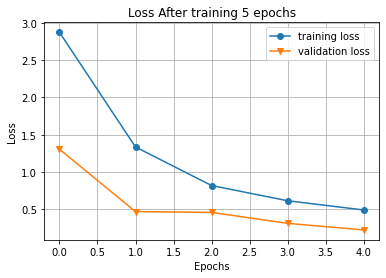

In [54]:
hist_dict = history.history

loss_values = hist_dict['loss']
val_loss_values = hist_dict['val_loss']

round_ = range(len(loss_values))
plt.plot(round_,loss_values,marker='o',label='training loss')
plt.plot(round_,val_loss_values,marker='v',label='validation loss')
plt.title("Loss After training 5 epochs")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()

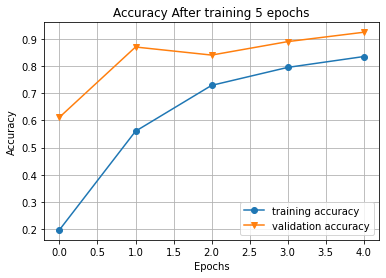

In [56]:
acc_values = hist_dict['accuracy']
val_acc_values = hist_dict['val_accuracy']

round_ = range(len(acc_values))
plt.plot(round_,acc_values,marker='o',label='training accuracy')
plt.plot(round_,val_acc_values,marker='v',label='validation accuracy')
plt.title("Accuracy After training 5 epochs")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

## check performance with classification report , confustion matrix

In [30]:
from sklearn.metrics import confusion_matrix,classification_report

y_pred = model.predict(validation_generator)
y_pred = np.argmax(y_pred,axis=1)

In [31]:
print('Confusion matrix')
print(confusion_matrix(validation_generator.classes,y_pred))

Confusion matrix
[[130   0   0 ...   0   0   0]
 [  0 163   0 ...   0   0   0]
 [  0   0  89 ...   0   0   0]
 ...
 [  0   0   0 ... 164   0   0]
 [  0   0   0 ...   0 127   0]
 [  0   0   0 ...   0   0 249]]


In [34]:
print('classification report')
class_labels = validation_generator.class_indices
class_labels = {v:k for k,v in class_labels.items()}

target_name = list(class_labels.values())
print(classification_report(validation_generator.classes,y_pred,target_names=target_name))

classification report
                     precision    recall  f1-score   support

     Apple Braeburn       0.49      0.79      0.61       164
     Apple Golden 1       0.95      0.99      0.97       164
     Apple Golden 2       0.96      0.54      0.69       164
     Apple Golden 3       0.57      1.00      0.72       161
 Apple Granny Smith       1.00      0.91      0.96       164
        Apple Red 1       0.77      0.98      0.86       164
        Apple Red 2       1.00      0.68      0.81       164
        Apple Red 3       1.00      1.00      1.00       144
Apple Red Delicious       1.00      1.00      1.00       166
   Apple Red Yellow       1.00      0.93      0.96       164
            Apricot       1.00      1.00      1.00       164
            Avocado       0.91      1.00      0.95       143
       Avocado ripe       1.00      0.79      0.88       166
             Banana       0.81      1.00      0.89       166
         Banana Red       0.83      0.90      0.86       166
 

# show with heatmap

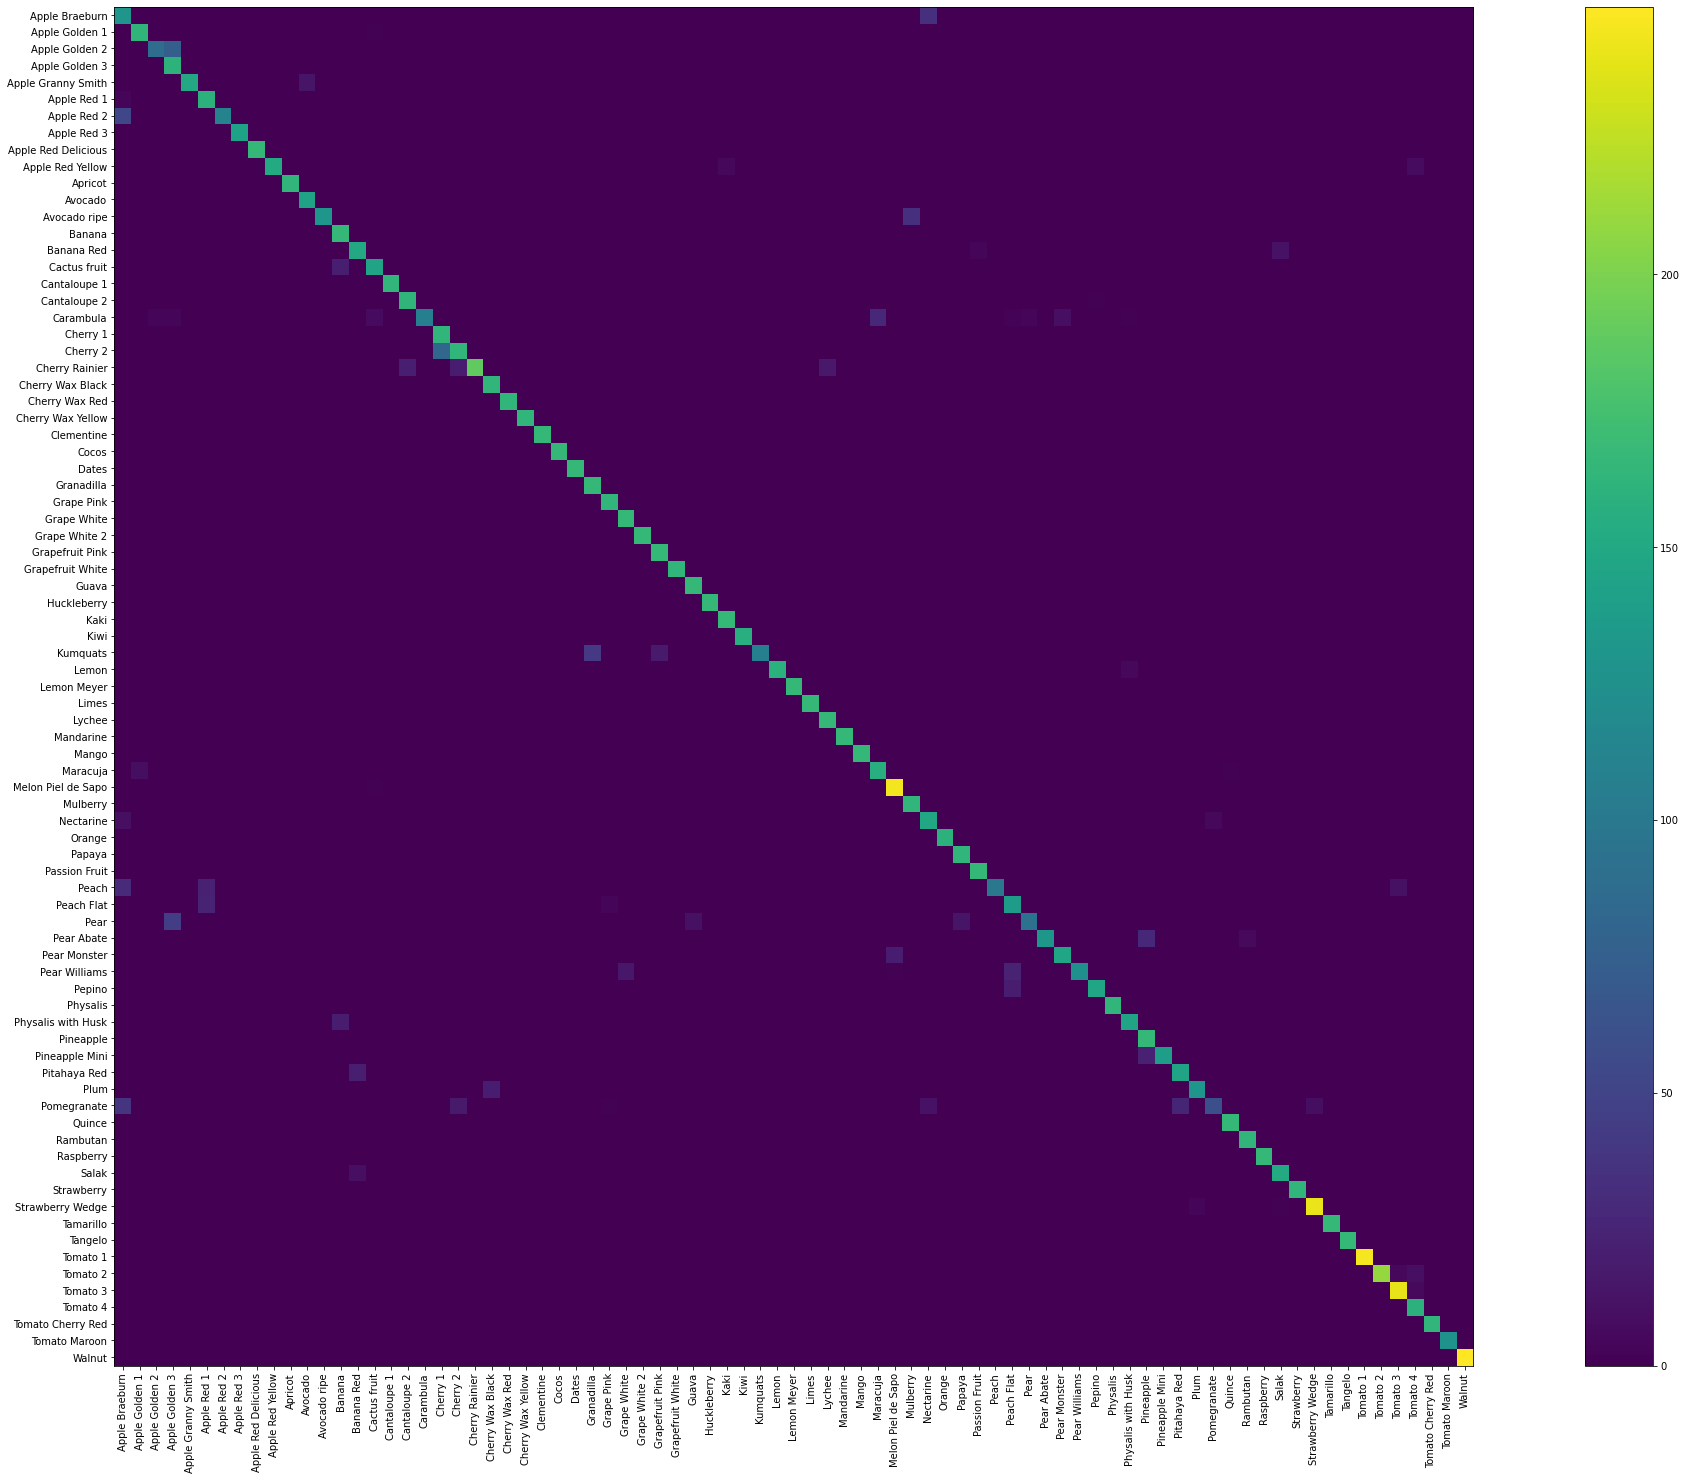

In [48]:
cfm = confusion_matrix(validation_generator.classes,y_pred)

plt.figure(figsize=(40,25))
plt.imshow(cfm,interpolation='nearest')
plt.xticks(range(len(target_name)),target_name,rotation=90)
plt.yticks(range(len(target_name)),target_name)
plt.colorbar()

## Test model with fruit classifier image 

In [139]:
from os import listdir
from os.path import isfile, join,isdir
from keras.preprocessing import image

def getRandomImage(path,width,height):
    """function loads a random images from a random folder in our test path """
    files = listdir(path)
    random_file = np.random.randint(0,len(files))
    
    path_class = files[random_file]
    file_path = path + path_class

    return image.load_img(file_path,target_size=(width,height)),file_path
    
def draw_test(name, pred, im, true_label):
    BLACK = [0,0,0]
    im = cv2.resize(im,None,fx=0.1,fy=0.1,interpolation=cv2.INTER_CUBIC)
    expanded_image = cv2.copyMakeBorder(im, 100, 0, 0, 100 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, "predited - "+ pred, (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    cv2.putText(expanded_image, "true - "+ true_label, (20, 120) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0), 2)
    cv2.imshow(name, expanded_image)
    
width = 32
height = 32

num_of_test_img = 20
files = []
true_label = []
predictions = []
for i in range(num_of_test_img):
    img, file_path = getRandomImage(test_data_dir,width,height)
    true_label.append(file_path.split('/')[-1])
    files.append(file_path)
    
    x = image.img_to_array(img)
    x = x*1./255
    x = np.expand_dims(x,axis=0)
    images = np.vstack([x])
    proability = model.predict(images,batch_size=1)
    classes = np.argmax(proability,axis=1)[0]
    predictions.append(classes)
    
class_ = {j:i for i,j in validation_generator.class_indices.items()}
for i in range(0, len(files)):
    image = cv2.imread(files[i])
    draw_test("Prediction", class_[predictions[i]], image, true_label[i])
    cv2.waitKey(0)

cv2.destroyAllWindows()